<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/ML_Models/W3_MLS_CreditCard_CustSegment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><font size=10>Artificial Intelligence and Machine Learning</center></font>
<center><font size=6>Machine Learning - Week 3</font></center>

<center><img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=871&q=80" width="720"></center>

<center><font size=6>Credit Card Customer Segmentation</font></center>

## Problem Statement

### Business Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

###  Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset
customer_data = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi2_ML/W3_KMeans_Cluster/W3_MLS_Credit_Card.csv")

In [4]:
# copying the data to another variable to avoid any changes to original data
df = customer_data.copy()

## Data Overview

### Displaying the first few rows of the data

In [5]:
# viewing the first 5 rows of the data
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]
df.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Checking the shape of the dataset

In [ ]:
df.shape

(660, 7)

* The dataset has 660 rows and 7 columns

### Checking the data types of the columns for the dataset.

In [8]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- All the columns in the data are numeric.

### Checking for missing values

In [9]:
# checking for missing values
df.isnull().sum()

,0
Sl_No,0
Customer_Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


- There are no missing values in the data.

### Checking for duplicate values

In [10]:
# checking the number of unique values in each column
df.nunique()

,0
Sl_No,660
Customer_Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


- There are less unique values in the *Customer_Key* column than the number of observations in the data. This means that there are duplicate values in the column.

Let's look at the duplicate values in the *Customer_Key* column closely.

In [12]:
# getting the count for each unique value in Customer_Key
data_grouped = df.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(df.loc[df.Customer_Key == i])

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


**Observations**

- There are 5 duplicate customer entries in the data.
- Most of these duplicates look like customer profile changes.
- There is no need to delete these records as these are actual occurrences at some point in the time.

We will drop the *Sl_No* and *Customer_Key* as they do not add any value to the analysis.

In [13]:
df.drop(columns=["Sl_No", "Customer_Key"], inplace=True)

### Checking the Statistical Summary

In [14]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


Observations

- The average credit limit is heavily right-skewed with a median average credit limit of 18000 dollars.
- The total number of credit cards ranges from 1 to 10 and seems to be evenly distributed with a close values of mean and median.
- *Total_visits_bank* is evenly distributed, but there are some customers who have never visited the bank.
- *Total_Visits_online* seems to be right-skewed and there are some customers who never used the online banking services.
- *Total_calls_made* is right-skewed and there are some customers who never preferred to make any calls to the bank

## Exploratory Data Analysis

The below functions need to be defined to carry out the EDA.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

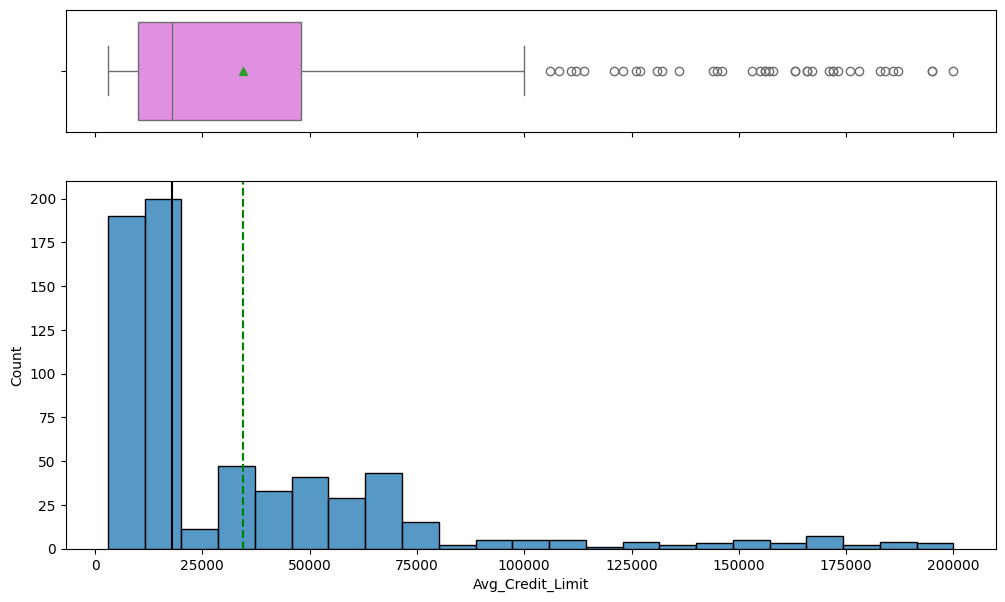

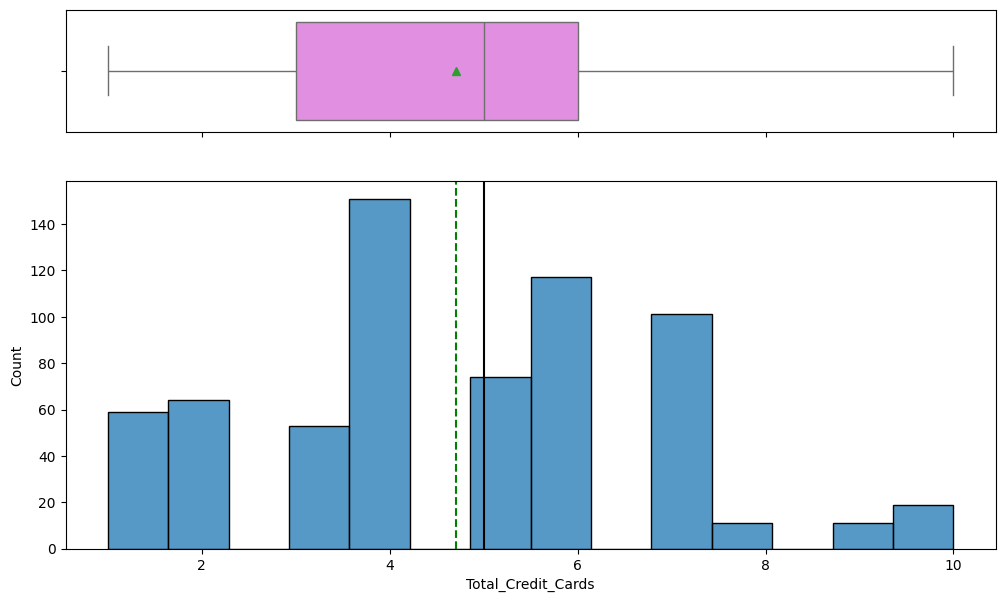

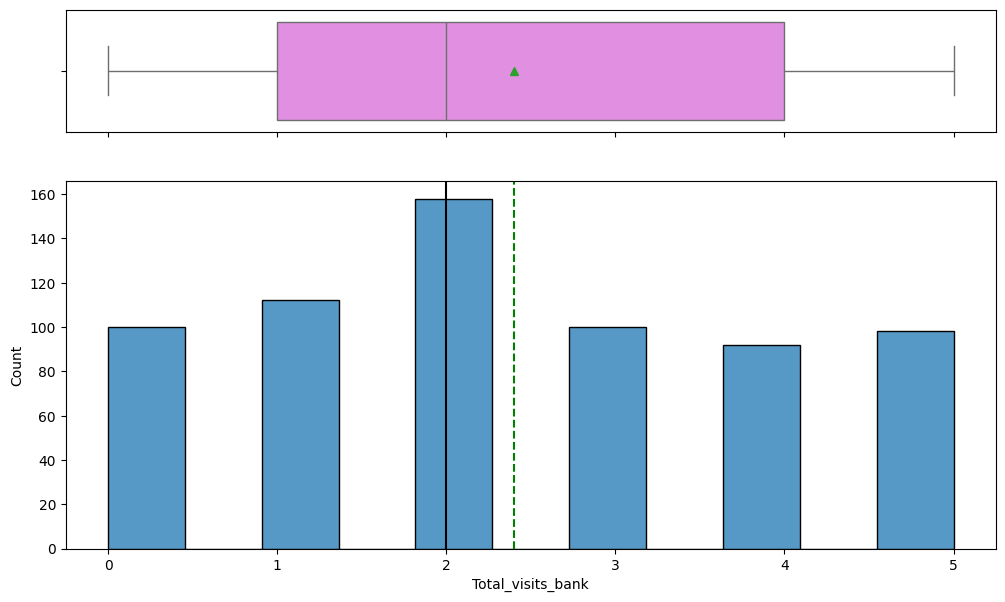

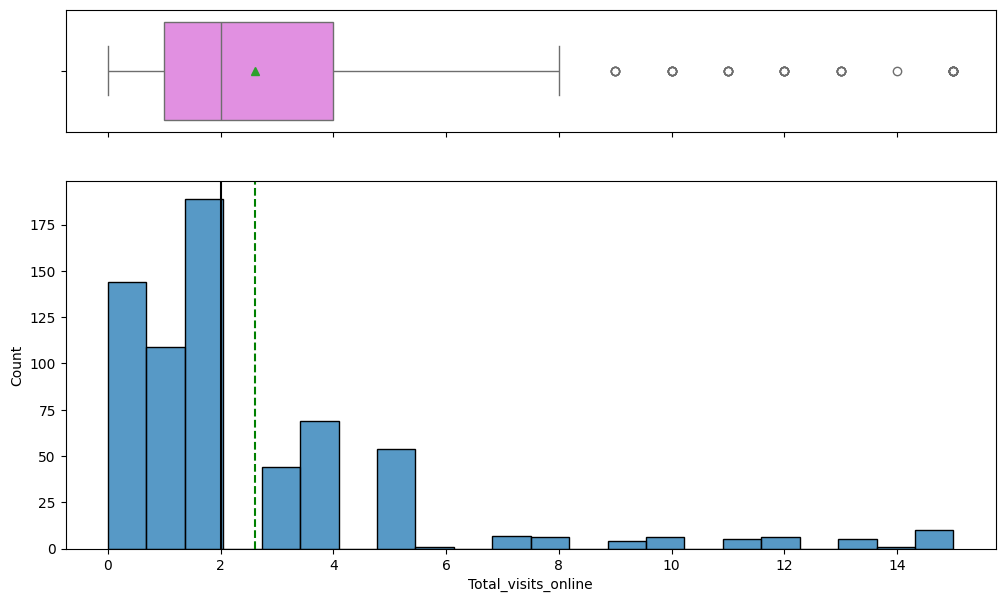

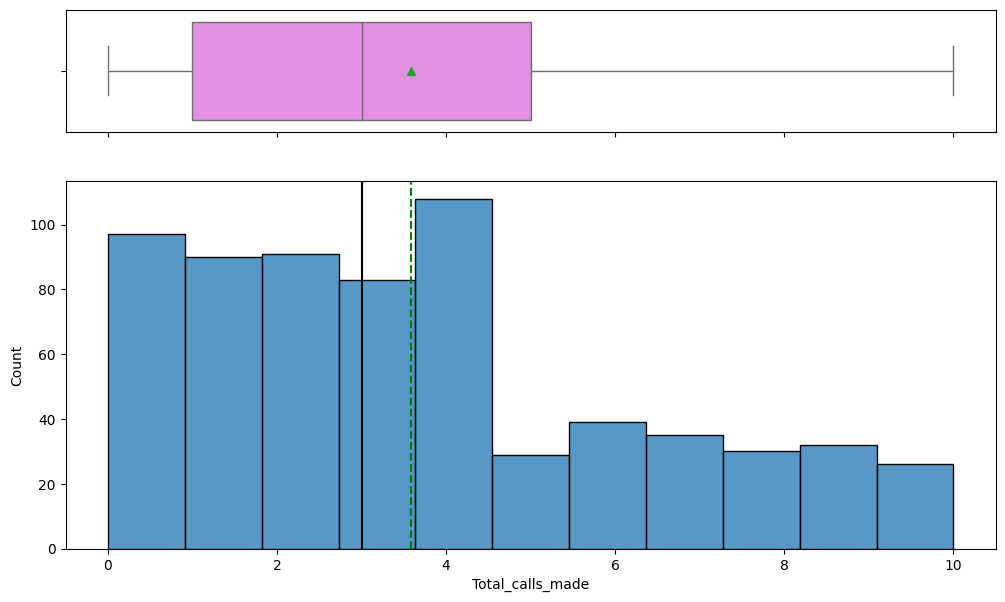

In [17]:
for col in df.columns:
    histogram_boxplot(df, col)

**Observations**

- There are outliers in the *Average_Credit_limit* column, but all the values are continuous, and the gap between the points is evenly distributed.
- In general, customers visit the bank twice a year, log in to the online portal twice a year, and make 3 calls to the customer service.
- We see some outliers in the Total_visits_online column, indicating that few customers log in to the online portal more frequently than the others.

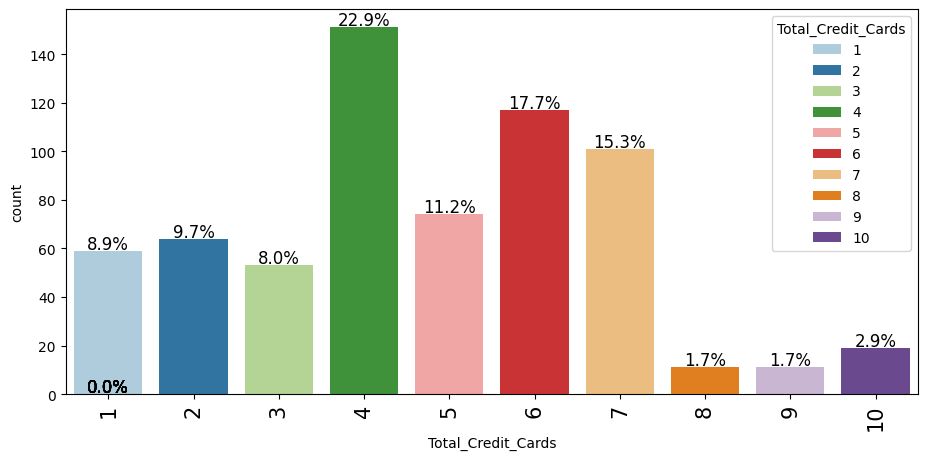

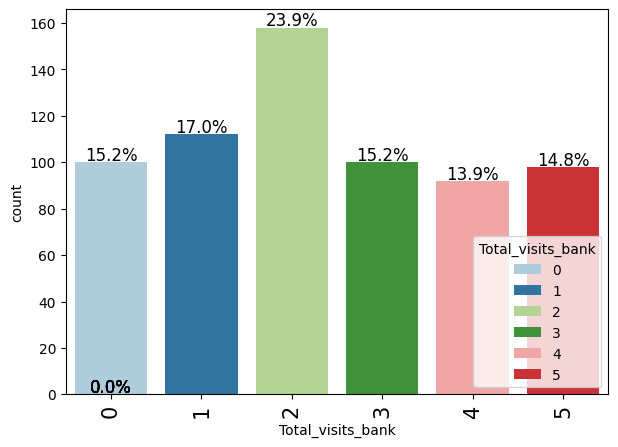

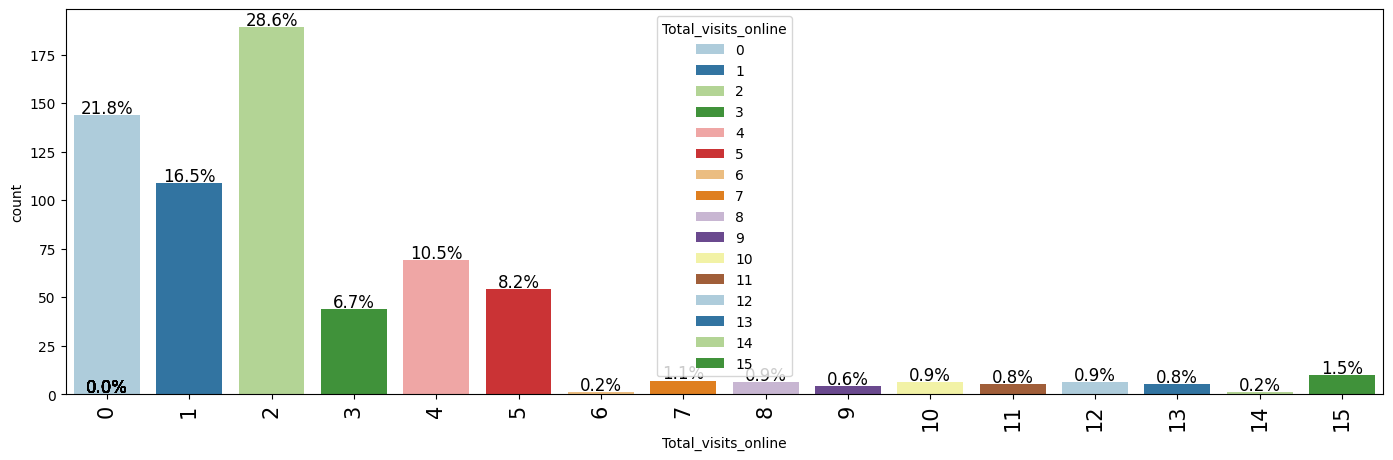

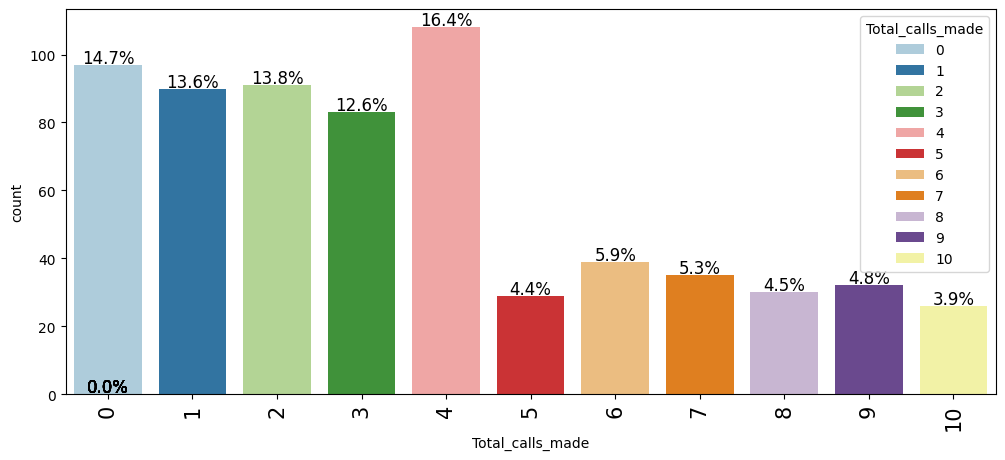

In [18]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

**Observations**

- Approximately half the customers in the data have 4 or fewer credit cards, and very few customers (approximately 6%) have more than 7 credit cards.
- Approximately 15% of the customers have never visited the bank.
- Approximately 22% of the customers have never logged in to the online portal, while ~7% of the customers used the online banking services more than 6 or more times yearly.
- Approximately 15% of the customers have never made a service-related call to the bank.

### Bivariate Analysis

**Let's check for correlations.**

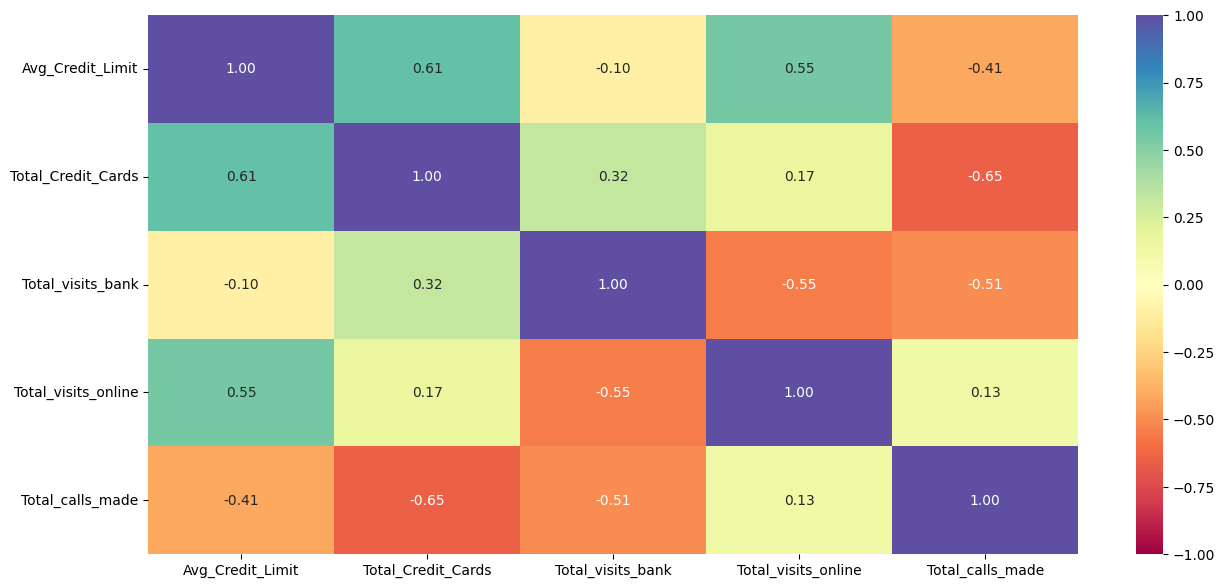

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- There is a moderate negative correlation between *Total_Calls_made* and *Total_credit_cards*.
- There is a moderate positive correlation between *Total_credit_cards* and *Avg_credit_limit*, indicating customers with a high average credit limit tend to have more credit cards.

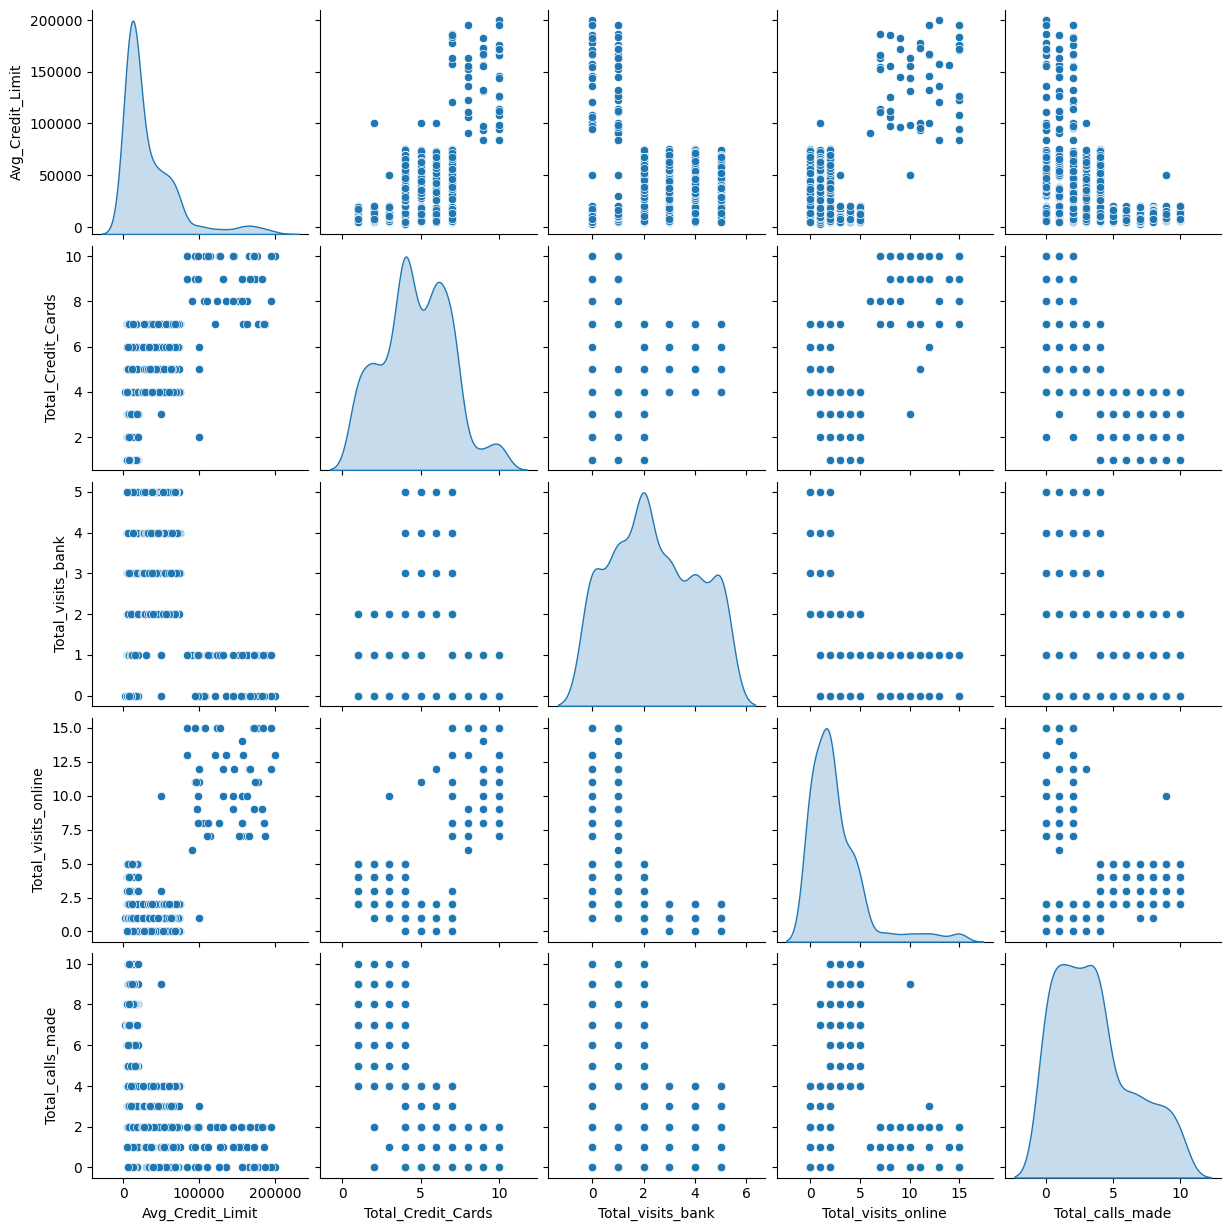

In [20]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**

- There no clear linear correlation between the variables.
- *Total_credit_cards* may have some clusters formed w.r.t other variables.

**Let's visualize the modes of contacting the bank in a 3D plot.**

In [21]:
# plotting a 3D scatterplot
fig = px.scatter_3d(df, x='Total_visits_bank', y='Total_visits_online', z='Total_calls_made')
fig.show()

- We can observe three segments of the customers by their preferred mode of contacting the bank.

## Data Preprocessing

### Outlier Check



- Let's check for outliers in the data.

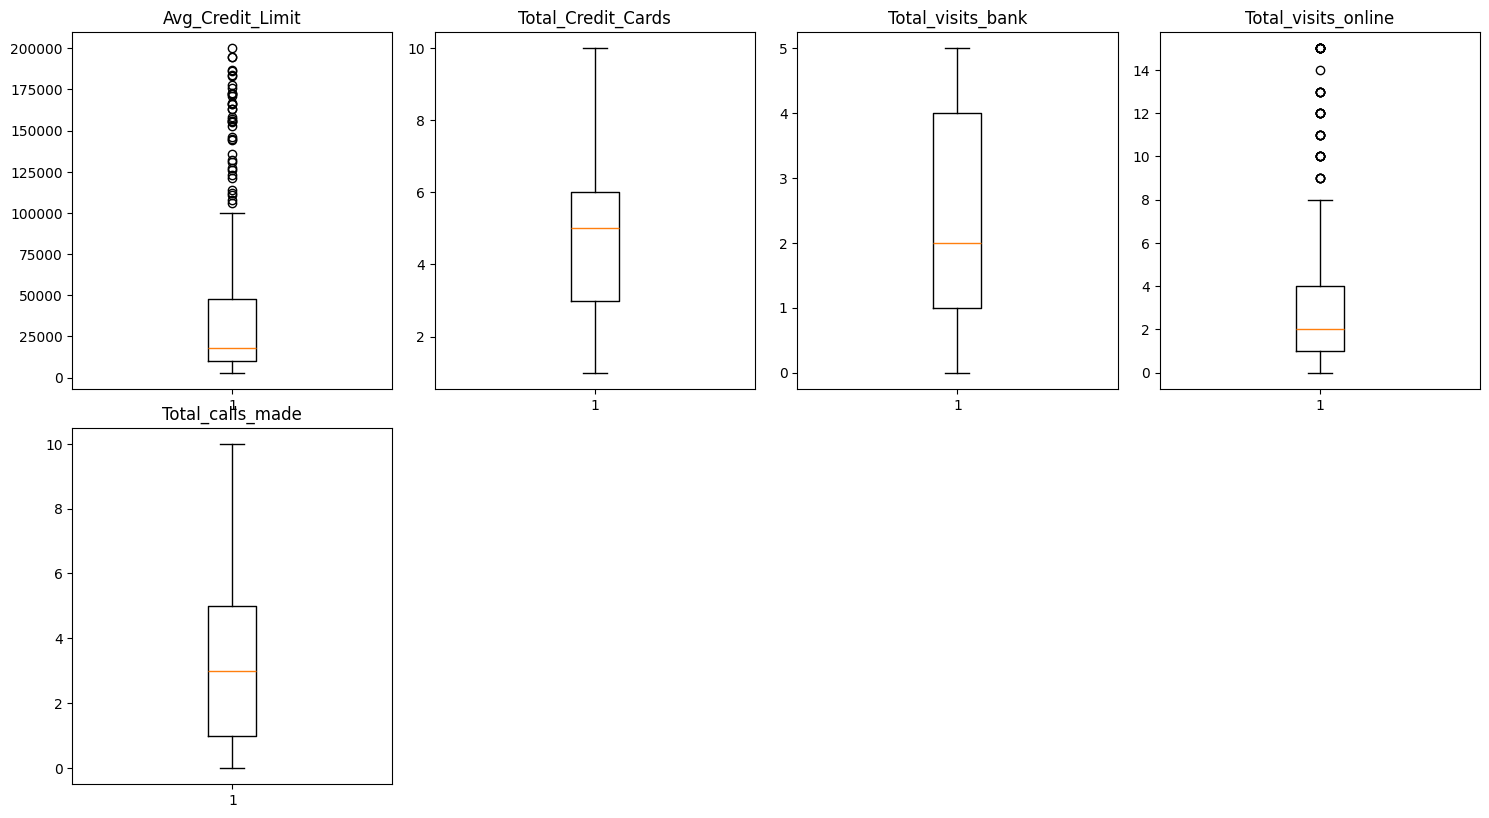

In [22]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are outliers in the columns *Avg_Credit_Limit* and *Total_Visits_online*.
- We will not treat the outliers as most of those outliers are not disjoint from the curve (continues curve).
- These outliers might also form their own cluster.

### Scaling



In [23]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

- subset_scaled = scaler.fit_transform(subset): This line does two things:

- fit(): The scaler object learns the mean and standard deviation of each feature in the subset DataFrame. This is necessary to perform the standardization.
- transform(): The scaler object applies the learned parameters to transform the data in subset by subtracting the mean and dividing by the standard deviation of each feature. The scaled data is then assigned to the variable subset_scaled.
####Why Scale Data Before Clustering?

- Scaling is a crucial step before applying clustering algorithms like K-Means. K-Means is distance-based and is sensitive to the scale of the features. If features have different scales, those with larger ranges can disproportionately influence the distance calculations and dominate the clustering process, leading to biased results.

By scaling the data, we ensure that all features contribute equally to the distance calculations, allowing the algorithm to identify clusters based on the underlying patterns in the data rather than the differences in feature scales.

- Formula for transform() in StandardScaler
- z = (x - u) / s
- Where:

z is the scaled value.
x is the original value of the feature.
u is the mean of the feature (calculated during fit()).
s is the standard deviation of the feature (calculated during fit()).
This formula essentially centers the data around zero (by subtracting the mean) and scales it to have a unit standard deviation (by dividing by the standard deviation). This process is also known as z-score standardization.

Impact of Outliers on StandardScaler and fit_transform()
StandardScaler, like many scaling methods based on mean and standard deviation, is sensitive to outliers. Outliers can significantly influence the calculated mean and standard deviation, leading to a distorted scaling process.

Here's how outliers can affect StandardScaler:

Inflated Standard Deviation: Outliers inflate the standard deviation of a feature, causing the scaled values of inliers (normal data points) to be compressed within a smaller range.

Shifted Mean: Outliers can shift the mean away from the center of the inliers, causing a skewed representation of the data after scaling.

Masked Patterns: The distorted scaling due to outliers can mask the true underlying patterns in the data, making it difficult for clustering algorithms to identify meaningful clusters.

####How fit_transform() handles outliers:

- The fit_transform() method simply calculates the mean and standard deviation from the data, including outliers, and then applies the standardization formula. It doesn't inherently handle outliers. Consequently, the scaled data might not be optimal for clustering if there are significant outliers.

- Mitigation Strategies for Outliers:

To address the impact of outliers, consider the following strategies:

  -   Outlier Removal/Treatment: Identify and remove or treat outliers before scaling. This could involve techniques like winsorization, capping, or transformation.

  -   Robust Scaling: Explore robust scaling methods like RobustScaler from sklearn.preprocessing, which are less sensitive to outliers. These methods use statistics like median and interquartile range instead of mean and standard deviation for scaling.

  -   Data Transformation: If the data is heavily skewed, apply transformations (like logarithmic or Box-Cox) to reduce the influence of outliers before scaling.

In [29]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


## Dimensionality Reduction and Visualization using t-SNE

### Reduction to 2 dimensions

In [25]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions

- fit_transform(): This is a method of the tsne object that does two things:
    - fit: It analyzes the input data (subset_scaled_df, which is the scaled version of your original data) to understand the relationships between data points.
    - transform: It applies the learned relationships to reduce the data into the desired number of dimensions (2 in this case).

- Nonlinear Relationships: t-SNE is designed to handle datasets with complex, nonlinear relationships between features. Original features might not be linearly separable, and simply selecting a subset of them might not accurately represent the underlying structure of the data.
- Global vs. Local Structure: Traditional dimensionality reduction methods like PCA (Principal Component Analysis) focus on preserving the global structure of the data (variance), which might not be the best way to separate clusters or identify local patterns. t-SNE, on the other hand, focuses on preserving the local neighborhood relationships, even if it means distorting the global structure.
- Probability Distributions: t-SNE works by modeling the probability distribution of neighbors around each point in both high-dimensional and low-dimensional spaces. It then optimizes these distributions to be as similar as possible. This process involves complex transformations that are not simply selecting or combining existing features.
- Feature Creation: Because of the need to capture these complex relationships and probability distributions, t-SNE inherently creates new features (dimensions) that are a combination of the original features and the learned non-linear relationships. These new features are designed to best represent the local similarities between data points in the lower-dimensional space.

#### Global Structure:

Refers to the overall relationships and patterns in the data across the entire dataset.
It considers the large-scale organization and arrangement of data points.
Example: In a dataset of customer purchase history, global structure might represent general trends like seasonal purchasing patterns or overall spending habits.
Methods focusing on global structure: PCA (Principal Component Analysis) is a classic example of a dimensionality reduction technique that focuses on preserving the global structure (variance) of the data.
#### Local Structure:

Refers to the relationships between data points in their immediate neighborhoods or clusters.
It focuses on the fine-grained details and how data points are organized within smaller groups.
Example: In the customer purchase history dataset, local structure might represent how customers with similar demographics or purchasing interests tend to buy similar products.
Methods focusing on local structure: t-SNE (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that prioritizes preserving local structure (neighborhood relationships) even if it means distorting the global structure to some extent. UMAP (Uniform Manifold Approximation and Projection) is another method that strikes a balance between local and global structure preservation.
- Analogy:

  - Think of a world map:

    - Global Structure: The overall shapes of continents, major mountain ranges, and oceans represent the global structure.
    - Local Structure: The detailed street layouts of individual cities or the arrangement of houses within a neighborhood represent the local structure.
- Why is the distinction important in dimensionality reduction?

  - Different dimensionality reduction techniques prioritize either global or local structure preservation based on the desired outcome.
  - PCA (global) is often used when you want to capture the most significant variance in the data and reduce dimensionality while maintaining the overall relationships.
  - t-SNE (local) is often used when you want to visualize clusters or groups of similar data points, even if those clusters have complex, non-linear relationships in the original high-dimensional space.
  - UMAP attempts to balance both, making it a versatile option in many cases.

In [ ]:
tsne_2d_data.head()

,Feature 1,Feature 2
0,7.077908,1.645623
1,-36.689129,10.257295
2,11.480668,9.739170
3,0.003503,-4.469326
4,9.615922,39.342167


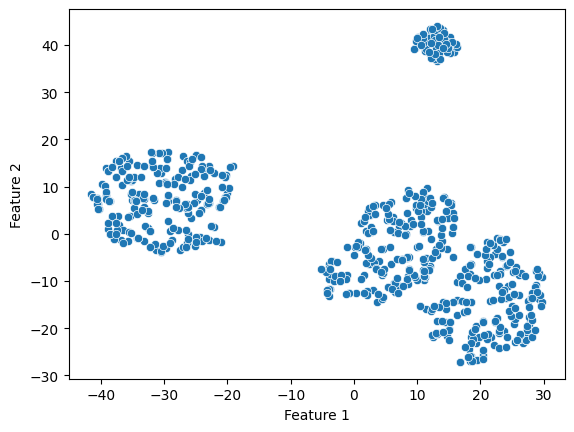

In [26]:
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");

- We can roughly see there are 4 clusters in the data.

- Let's try out different values of perplexity.

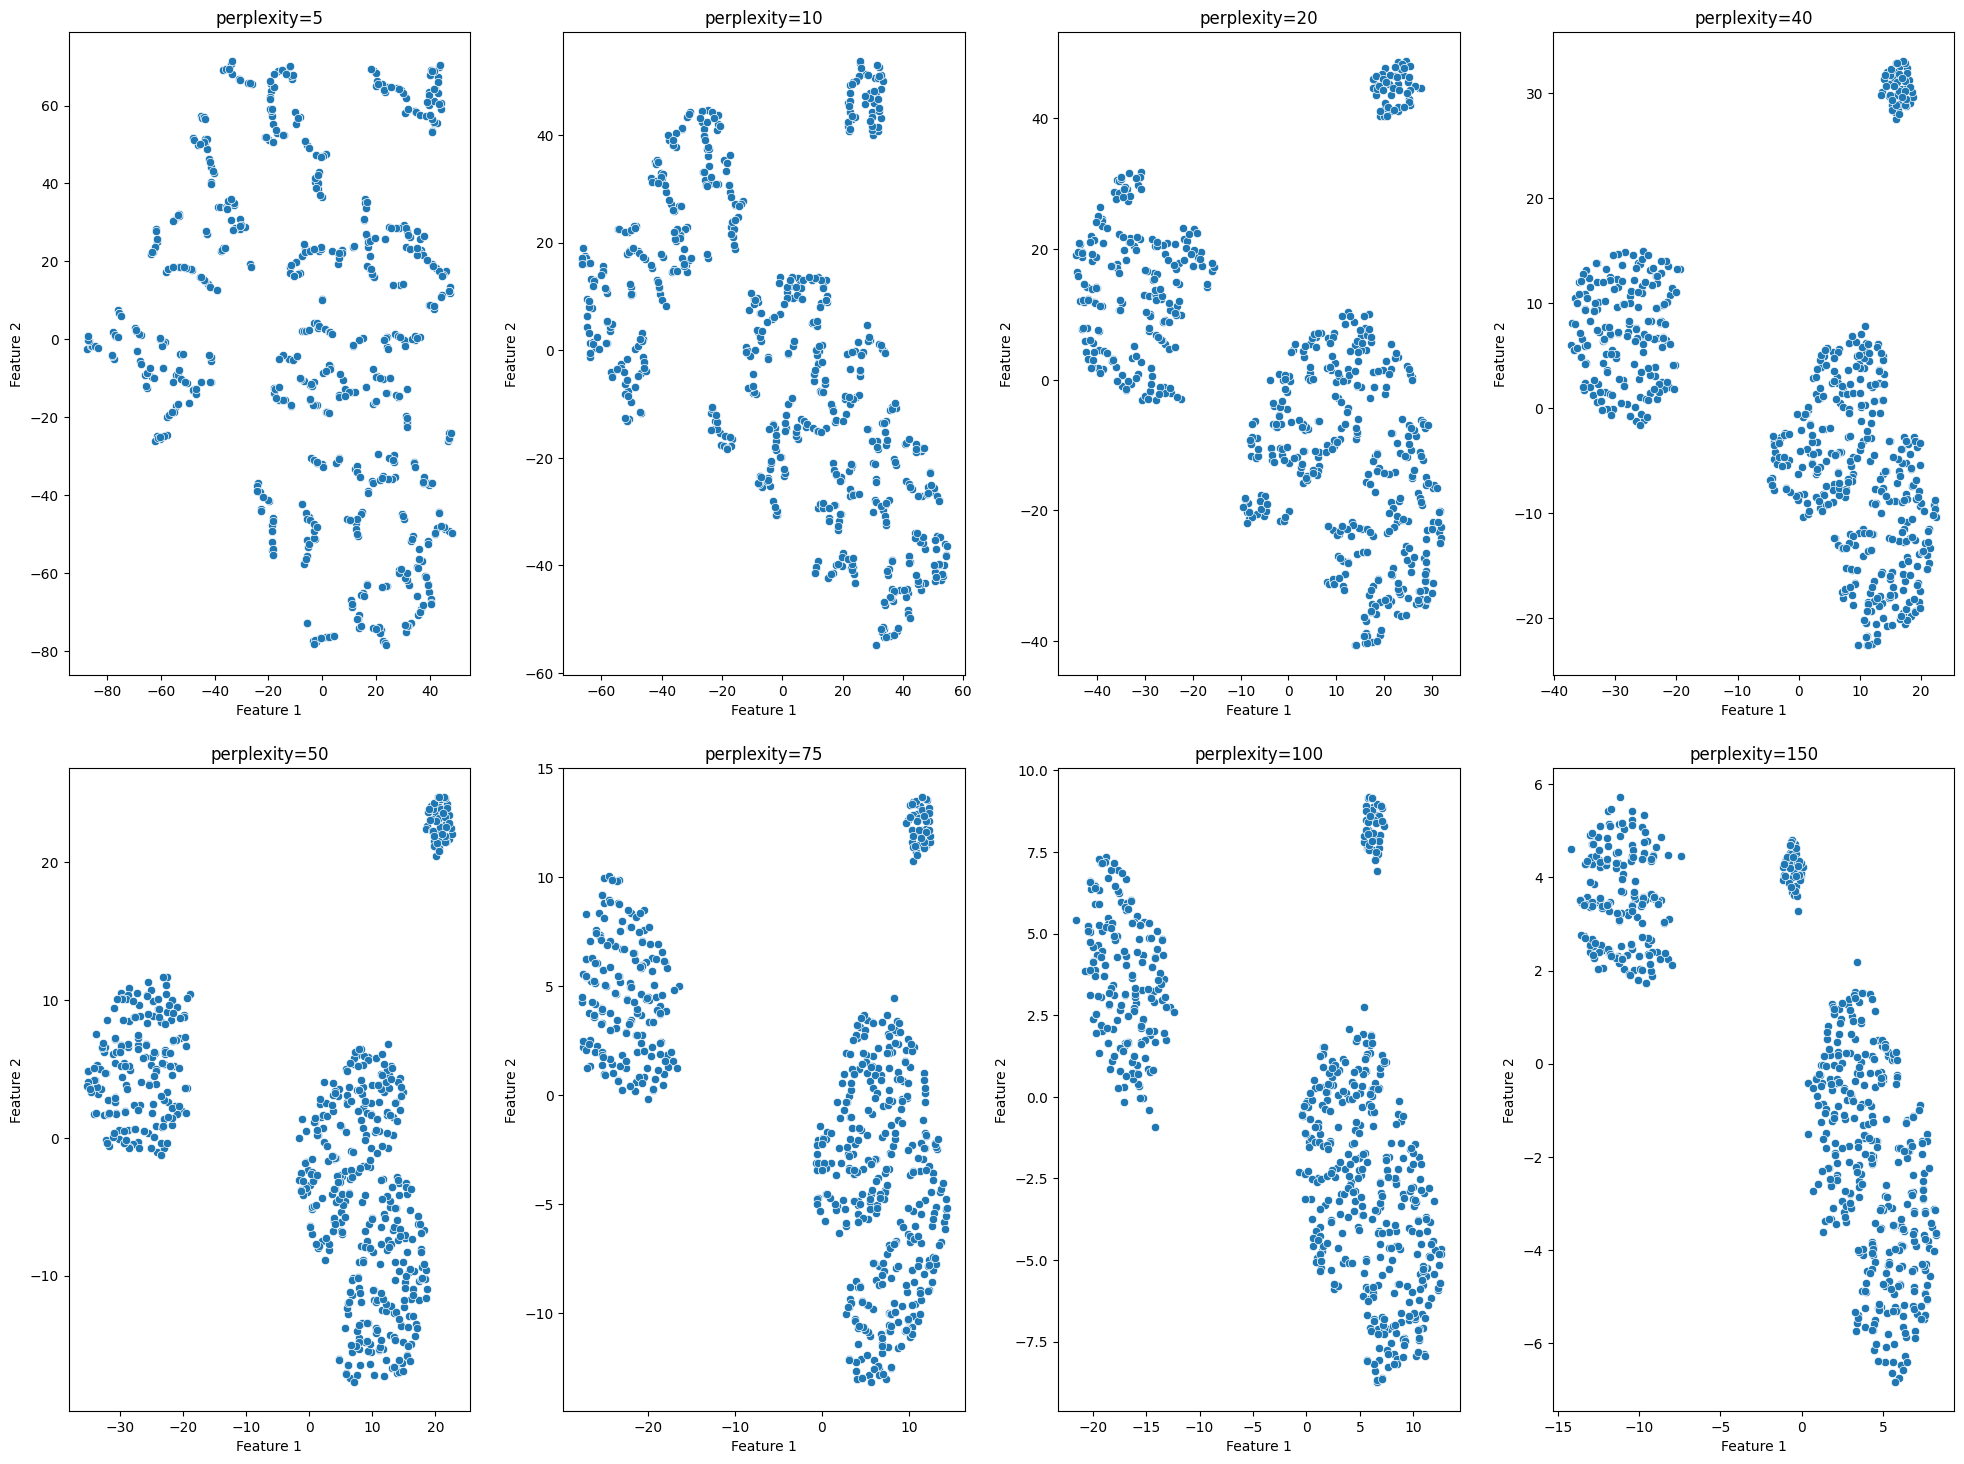

In [27]:
# Define the list of perplexity values to iterate over
perplexities = [5, 10, 20, 40, 50, 75, 100, 150]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=RS)    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    X_red = tsne.fit_transform(subset_scaled_df)   # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    red_data_df = pd.DataFrame(data=X_red, columns=["Feature 1", "Feature 2"])    # creating a new dataframe with reduced dimensions

    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

- The data seems to exhibit a good visual separation for perplexity=50, and we can roughly see there are 3 or 4 clusters.
- For lower values of perplexity, the data seems to be sparse. This is because, t-SNE tries to preserve local structure and consider only a small neighbourhood.
- As we increase the perplexity, the data seems to be dense and it is converging to 3 clusters.
- We'll go ahead with the perplexity value of 50.

In [28]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_data.head()

,Feature 1,Feature 2
0,8.534912,2.117388
1,-33.904140,7.520973
2,12.498768,6.759699
3,2.261002,3.999593
4,18.613714,22.559013


### Reduction to 3 dimensions

- We'll go ahead with perplexity=50

In [38]:
# Initiating the TSNE object and setting output dimension to 3
# n_components=3 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one core for parallel computation, which speeds up the process
tsne = TSNE(n_components=3, perplexity=50, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have three columns corresponding to the three reduced dimensions

- By reducing the data to a lower dimension using t-SNE, we can create scatter plots that reveal clusters and relationships between data points that might not be apparent in the original high-dimensional space. This helps us to:

  - Understand the data structure: We can see how data points are grouped and whether there are distinct clusters or patterns.
  - Identify potential outliers: Points that are far away from other points in the lower-dimensional space might be outliers in the original data.
  - Gain insights for further analysis: The visualization can guide further analysis and model building by suggesting potential groupings or features of interest.
#### Why 2 or 3 Dimensions?

We typically choose 2 or 3 dimensions because these are the dimensions that we can readily visualize:

- 2D: Scatter plots on a 2D plane are the most common and easiest to interpret.
- 3D: 3D scatter plots add another layer of information and can sometimes reveal patterns that are not apparent in 2D.
While t-SNE can technically reduce data to any number of dimensions, going beyond 3 dimensions makes visualization impractical for humans.

#### Beyond Visualization:

Although visualization is the primary motivation for using t-SNE with 2 or 3 dimensions, the reduced data can sometimes also be used for other tasks, such as:

- Clustering: The clusters revealed by the t-SNE visualization can be used as input for clustering algorithms or to evaluate the performance of clustering results.
- Feature Engineering: In some cases, the new features created by t-SNE might be used as input for other machine learning models, although this is less common.

In [39]:
tsne_3d_data.head()

,Feature 1,Feature 2,Feature 3
0,3.625361,1.319274,4.301147
1,-11.841296,4.099189,3.003952
2,2.950738,2.766244,-0.250041
3,0.378605,0.977825,0.198493
4,6.931584,9.482984,0.970121


In [40]:
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

- The data seems to exhibit a good visual separation for perplexity=50 in three dimensions too, and we can roughly see there are 3 or 4 clusters.

- One can try out a similar exercise of checking different values of perplexity for the 3-dimensional data found from t-SNE.

## Model Building

- We'll build a K-means Clustering model now.

In [30]:
k_means_df = subset_scaled_df.copy()

In [31]:
clusters = range(2, 11)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=RS)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_


    WCSS.append(wcss)

    print("Number of Clusters:", k, "\twcss:", wcss)

Number of Clusters: 2 	wcss: 2040.9898164784947
Number of Clusters: 3 	wcss: 933.0437490000528
Number of Clusters: 4 	wcss: 780.7736895551773
Number of Clusters: 5 	wcss: 729.7775796939327
Number of Clusters: 6 	wcss: 654.2363335547991
Number of Clusters: 7 	wcss: 621.1900732083062
Number of Clusters: 8 	wcss: 576.1657087694119
Number of Clusters: 9 	wcss: 553.8059084968586
Number of Clusters: 10 	wcss: 534.407135504733


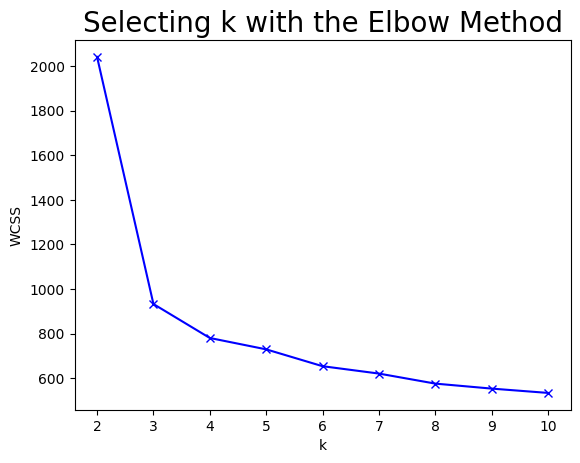

In [32]:
plt.plot(clusters,WCSS,"bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Observations**

- The appropriate value of k from the Elbow curve seems to be 3 or 4.

**Let's check the silhouette scores.**

In [33]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=RS)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.3280708837264839)
For n_clusters = 6, the silhouette score is 0.24847126878075285)
For n_clusters = 7, the silhouette score is 0.22386857007469432)
For n_clusters = 8, the silhouette score is 0.2424290733851475)
For n_clusters = 9, the silhouette score is 0.23602958161384577)


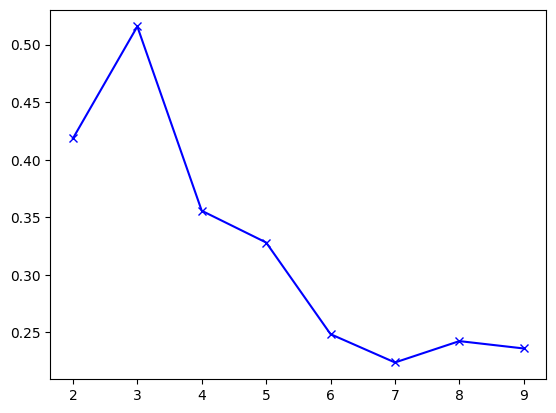

In [34]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

**Observations**

- The silhouette coefficient for 3 clusters is the highest.

- We'll go ahead with K=3.

In [35]:
kmeans = KMeans(n_clusters=3, random_state=RS)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=0)

In [41]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_    # scaled
df1["K_means_segments"] = kmeans.labels_    # original
tsne_2d_data["K_means_segments"] = kmeans.labels_    # t-SNE 2D
tsne_3d_data["K_means_segments"] = kmeans.labels_    # t-SNE 3D

## Cluster Profiling

### Visualizing Final Clusters

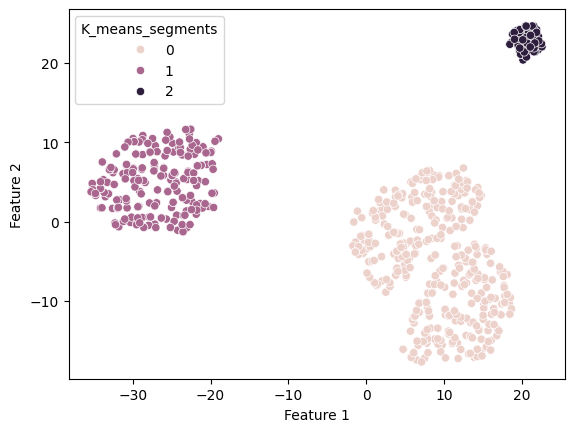

In [42]:
# visualizing the final cluster using t-SNE 2D
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='K_means_segments');

In [43]:
# visualizing the final cluster using t-SNE 3D
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3',color='K_means_segments')
fig.show()

### Cluster Characteristics

In [44]:
km_cluster_profile = df1.groupby("K_means_segments").mean()

In [45]:
km_cluster_profile["count_in_each_segment"] = (
    df1.select_dtypes(include=np.number).groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [46]:
# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [47]:
num_col = df1.select_dtypes(include=np.number).columns.to_list()

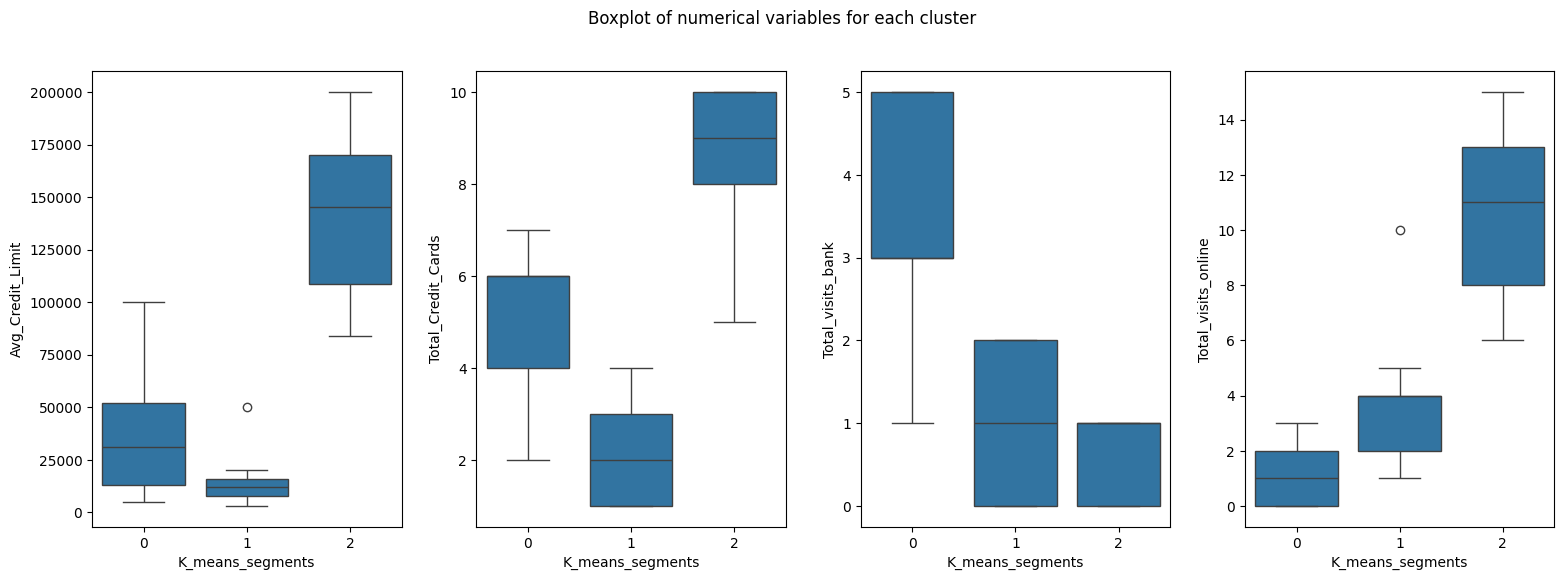

In [48]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for i in range(4):
    sns.boxplot(ax=axes[i], y=df1[num_col[counter]], x=df1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

Cluster 0:

- Moderate average credit limit.
- Moderate number of total credit cards.
- Moderate number of visits to the bank.
- Low online interactions.
- Moderate number of calls made.
- Contains a relatively large number of customers (386)

Cluster 1:

- Low average credit limit.
- Low number of total credit cards.
- Low number of visits to the bank.
- Moderate online interactions.
- High number of calls made
- Contains a moderate number of customers (224)

Cluster 2:

- High average credit limit.
- High number of total credit cards.
- Very low number of visits to the bank.
- Very high online interactions.
- Very low number of calls made.
- Contains a small number of customers (50)

## Business Insights and Recommendations

**Cluster 0**

Recommendation: Focus on In-Person Services

- Cluster 0 consists of customers who prefer visiting the bank for their banking needs. Since they have an average credit limit and number of credit cards, there is an opportunity to increase revenue by focusing on the volume of customers in this cluster.
- Consider enhancing the in-branch experience, providing personalized assistance, and offering tailored products to meet the needs of these customers who prefer face-to-face interactions.



**Cluster 1**

Recommendation: Incentivize Online Banking

- Premium customers in Cluster 1 have the potential to add more revenue to the bank. To capitalize on this, the bank should run incentives, promotions, and discounts to encourage more customers to adopt online banking and paperless billing.
- Implement marketing campaigns highlighting the benefits of online banking, such as convenience, time-saving, and exclusive offers for premium customers.


**Cluster 2**

Recommendation: Automation and Expansion of online Banking

- Cluster 2 shows a very high level of online interactions, it is essential to invest in and enhance the online customer experience. This could include improving the user interface of online platforms, providing personalized online offers, and ensuring a seamless digital journey.
- Given the high average credit limit in this cluster, consider tailoring credit limit increase offers for customers who fall within similar profiles.
- Consider expanding online banking services to popular chat applications like WhatsApp and Telegram to provide customers with more flexibility and convenience in their interactions.

<font size=5 color='blue'>Power Ahead!</font>
___